# Diabets Exploratory Data Analaysis 

In [ ]:
This data is of different people from different continents from 2015 to 2022, which has checked their Diabet.

## Load Libraries and Packages.

In [234]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv("diabete.csv")

## Data Extraction

In [175]:
print(df.head())

   year  gender   age  race:AfricanAmerican  race:Asian  race:Caucasian  \
0  2015  Female  29.0                     0           1               0   
1  2015    Male  18.0                     0           0               0   
2  2015    Male  41.0                     0           0               1   
3  2015  Female  49.0                     0           0               1   
4  2015    Male  42.0                     0           0               1   

   race:Hispanic  race:Other  hypertension  heart_disease smoking_history  \
0              0           0             0              0           never   
1              0           1             0              0           never   
2              0           0             0              0           never   
3              0           0             0              0         current   
4              0           0             0              0         No Info   

     bmi  hbA1c_level  blood_glucose_level  diabetes  
0  19.95          5.0          

In [176]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   race:AfricanAmerican  100000 non-null  int64  
 4   race:Asian            100000 non-null  int64  
 5   race:Caucasian        100000 non-null  int64  
 6   race:Hispanic         100000 non-null  int64  
 7   race:Other            100000 non-null  int64  
 8   hypertension          100000 non-null  int64  
 9   heart_disease         100000 non-null  int64  
 10  smoking_history       100000 non-null  object 
 11  bmi                   100000 non-null  float64
 12  hbA1c_level           100000 non-null  float64
 13  blood_glucose_level   100000 non-null  int64  
 14  diabetes              100000 non-null  int64  
dtypes

In [177]:
print(df.describe())

                year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          0.000000        0.00000   

In [178]:
print(df.isnull())

        year  gender    age  race:AfricanAmerican  race:Asian  race:Caucasian  \
0      False   False  False                 False       False           False   
1      False   False  False                 False       False           False   
2      False   False  False                 False       False           False   
3      False   False  False                 False       False           False   
4      False   False  False                 False       False           False   
...      ...     ...    ...                   ...         ...             ...   
99995  False   False  False                 False       False           False   
99996  False   False  False                 False       False           False   
99997  False   False  False                 False       False           False   
99998  False   False  False                 False       False           False   
99999  False   False  False                 False       False           False   

       race:Hispanic  race:

## Data Cleaning

In [235]:
df["year"] = pd.to_datetime(df["year"])

## Data Normalization and Calculations.

In [ ]:
First we must encode the column gender and smoking_history into numbers. 

In [236]:
encoder = LabelEncoder()
df["gender"] = encoder.fit_transform(df["gender"])

In [237]:
encoder = LabelEncoder()
df["smoking_history"]= encoder.fit_transform(df["smoking_history"])

In [222]:
print(df.head())

                           year  gender   age  race:AfricanAmerican  \
0 1970-01-01 00:00:00.000002015       0  29.0                     0   
1 1970-01-01 00:00:00.000002015       1  18.0                     0   
2 1970-01-01 00:00:00.000002015       1  41.0                     0   
3 1970-01-01 00:00:00.000002015       0  49.0                     0   
4 1970-01-01 00:00:00.000002015       1  42.0                     0   

   race:Asian  race:Caucasian  race:Hispanic  race:Other  hypertension  \
0           1               0              0           0             0   
1           0               0              0           1             0   
2           0               1              0           0             0   
3           0               1              0           0             0   
4           0               1              0           0             0   

   heart_disease  smoking_history    bmi  hbA1c_level  blood_glucose_level  \
0              0                4  19.95          

In [ ]:
print(encoder.inverse_transform([0,1,2,3,4,5,6]))

In [ ]:
0=No Info  1=current  2=ever  3=former  4=never  5=not current  

In [211]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  int64  
 2   age                   100000 non-null  float64
 3   race:AfricanAmerican  100000 non-null  int64  
 4   race:Asian            100000 non-null  int64  
 5   race:Caucasian        100000 non-null  int64  
 6   race:Hispanic         100000 non-null  int64  
 7   race:Other            100000 non-null  int64  
 8   hypertension          100000 non-null  int64  
 9   heart_disease         100000 non-null  int64  
 10  smoking_history       100000 non-null  int64  
 11  bmi                   100000 non-null  float64
 12  hbA1c_level           100000 non-null  float64
 13  blood_glucose_level   100000 non-null  int64  
 14  diabetes              100000 non-null  int64  
dtypes

In [212]:
for column in ["bmi", "age","hypertensio","heart_disease","blood_glucose_level","blood_glucose_level" ]:
    print("The smallest data ", column, "is:", df[column].min())


The smallest data  bmi is: 10.01
The smallest data  age is: 0.08
The smallest data  hypertension is: 0
The smallest data  heart_disease is: 0
The smallest data  blood_glucose_level is: 80
The smallest data  blood_glucose_level is: 80


In [213]:
for column in ["bmi", "age","hypertensio","heart_disease","blood_glucose_level","blood_glucose_level" ]:
    print("The bigest data of", column, "is:", df[column].max())

The bigest data of bmi is: 95.69
The bigest data of age is: 80.0
The bigest data of hypertension is: 1
The bigest data of heart_disease is: 1
The bigest data of blood_glucose_level is: 300
The bigest data of blood_glucose_level is: 300


## Distribution chart of age and bmi

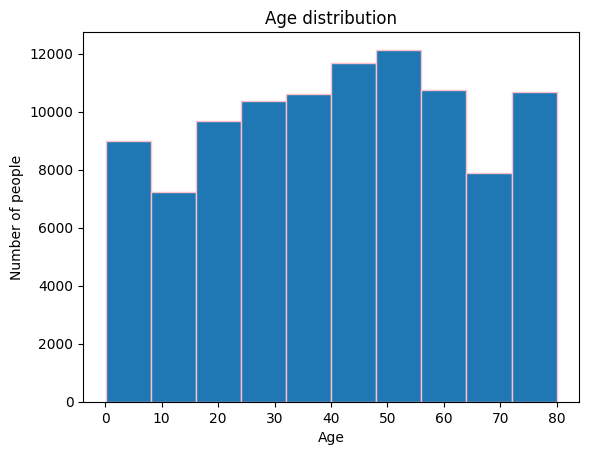

In [225]:
ages = df["age"]

plt.hist(ages, bins=10, edgecolor="pink", alpha=1)

plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()


In [ ]:
# نتیجه گیری : از نمودار صدهزارتایی ما بیشتر افرادچهل تا پنجاه و پنج ساله بررسی شده است

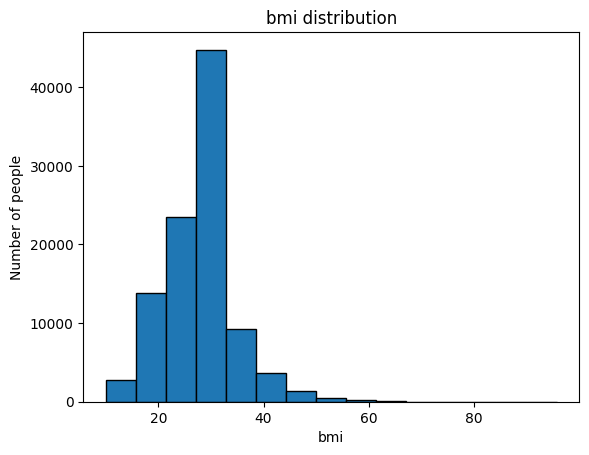

In [189]:
BMIES = df["bmi"]

plt.hist(BMIES, bins=15, edgecolor="black", alpha=1)

plt.title("bmi distribution")
plt.xlabel("bmi")
plt.ylabel("Number of people")
plt.show()

In [ ]:
# نتیجه گیری : از نمودار صدهزارتایی ما بیشتر افراد با شاخص توده بدنی بیست تا سی و پنج بررسی شده است

## Box plot for comparison of BMI and blood sugar levels between diabetic and non-diabetic subjects.

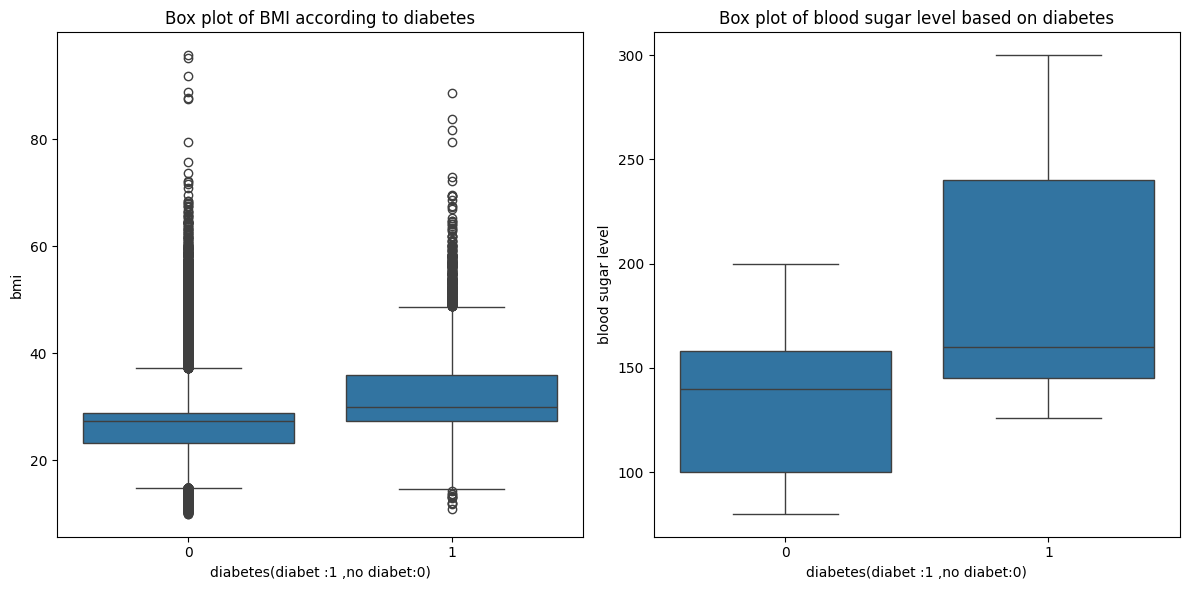

In [190]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
sns.boxplot(x="diabetes", y="bmi", data=df)
plt.title("Box plot of BMI according to diabetes")
plt.xlabel("diabetes(diabet :1 ,no diabet:0)")
plt.ylabel("bmi")
plt.subplot(1, 2, 2)
sns.boxplot(x="diabetes", y="blood_glucose_level", data=df)
plt.title("Box plot of blood sugar level based on diabetes")
plt.xlabel("diabetes(diabet :1 ,no diabet:0)")
plt.ylabel("blood sugar level")
plt.tight_layout()
plt.show()

In [ ]:
#نتیجه گیری :نمودار به طور کلی نشان می دهد که دیابت تاثیر قابل توجهی بر سطح قند خون دارد در حالی که تاثیر ان بر شاخص توده بدنی کمتر قابل توجه است

## Bar chart to compare number of diabetics by gender or continent.

C:\Users\sogand\AppData\Local\Temp\ipykernel_2880\2606356477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)


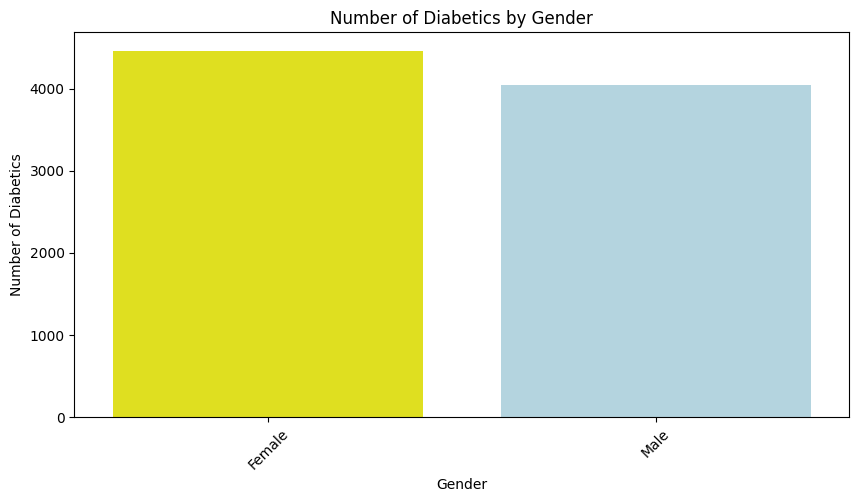

In [232]:
gender_counts = df[df["diabetes"] == 1]["gender"].value_counts()

if gender_counts.empty:
    print("No diabetic data available to plot.")
else:
    colors = ['lightblue' if gender == "Male" else 'yellow' for gender in gender_counts.index]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)
    plt.title("Number of Diabetics by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Number of Diabetics")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#نتیجه گیری :تعداد دیابتی ها در بین مردان بیشتر از زنان است و این میتونه به عوامل مختلفی بستگی داشته باشد

## Correlation matrix plot to display the correlation between characteristics such as age, BMI, blood sugar

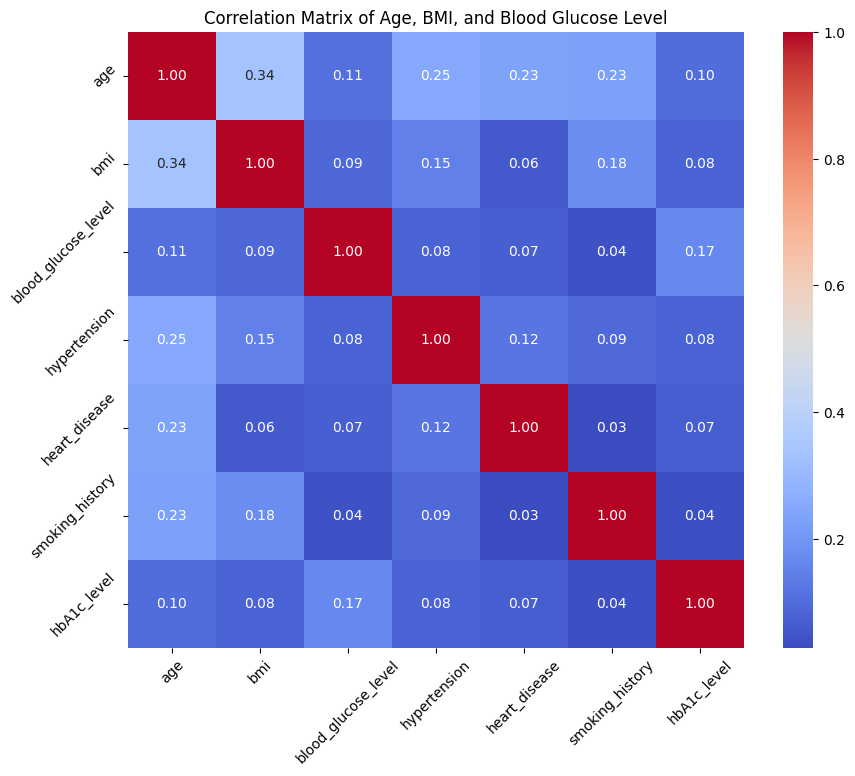

In [223]:
features = df[["age", "bmi", "blood_glucose_level", "hypertension", "heart_disease", "smoking_history", "hbA1c_level"]]

correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Age, BMI, and Blood Glucose Level")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
#نتیجه گیری : سن با شاخص توده بدنی همبستگی مثبت متوسطی دارد. شاخص توده بدنی با سطح گلوکز خون همبستگی ضعیفی دارد . فشار خون بالا با سن  همبستگی مثبت متوسطی دارد . بیماری قلبی با سن همبستگی مثبت متوسطی دارد . سابقه سیگار کشیدن با سن همبستگی مبت متوسطی دارد . 

## Bar chart comparing the number of diabetes cases across different continents

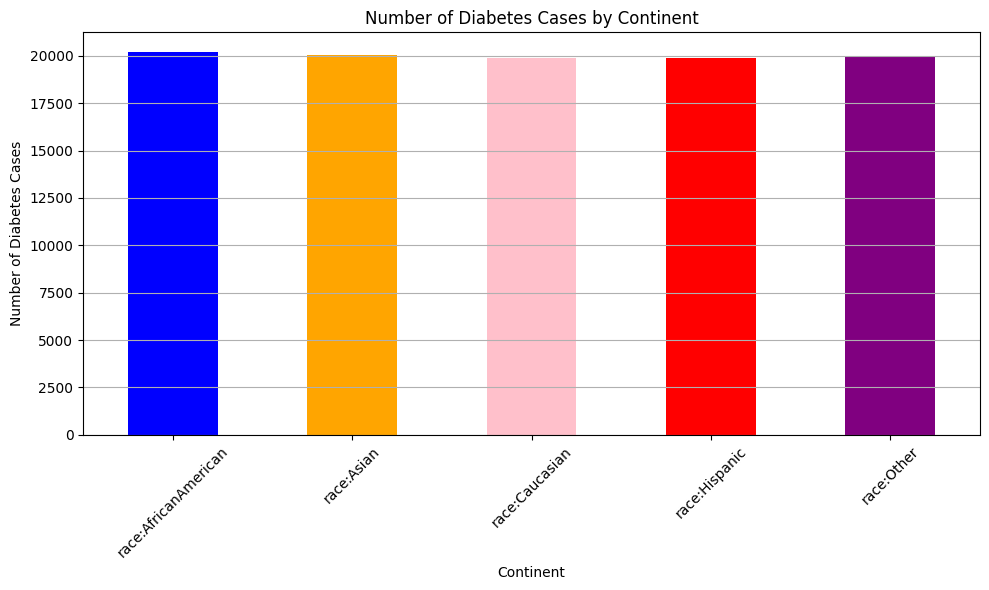

In [110]:
continent_columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]

diabetes_counts = df[continent_columns].sum()

plt.figure(figsize=(10, 6))
diabetes_counts.plot(kind="bar", color=["blue", "orange", "pink", "red", "purple"])
plt.title("Number of Diabetes Cases by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Diabetes Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.tight_layout()
plt.show()

In [ ]:
#نتیجه گیری: گروه نژاد آمریکایی _آفریقایی بیشترین تعداد موارد به دیابت را دارد

##  pie chart showing the percentage of diabetic and non-diabetic individuals

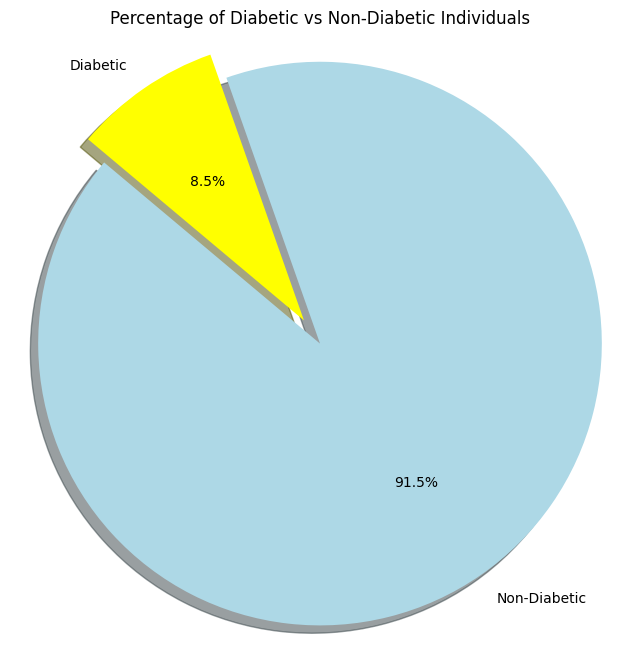

In [84]:
diabetes_counts = df["diabetes"].value_counts()

labels = ["Non-Diabetic", "Diabetic"]  
sizes = [diabetes_counts.get(0, 0), diabetes_counts.get(1, 0)] 
colors = ["lightblue", "yellow"]  
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")  

plt.title("Percentage of Diabetic vs Non-Diabetic Individuals")

plt.show()

In [ ]:
#نتیجه گیری :بیشترین تعداد افراد در داده هاغیر دیابتی هستند نشان دهنده وضعیت سلامتی بهتری در جامعه است

## Multiple bar graph of smoking history and diabetes

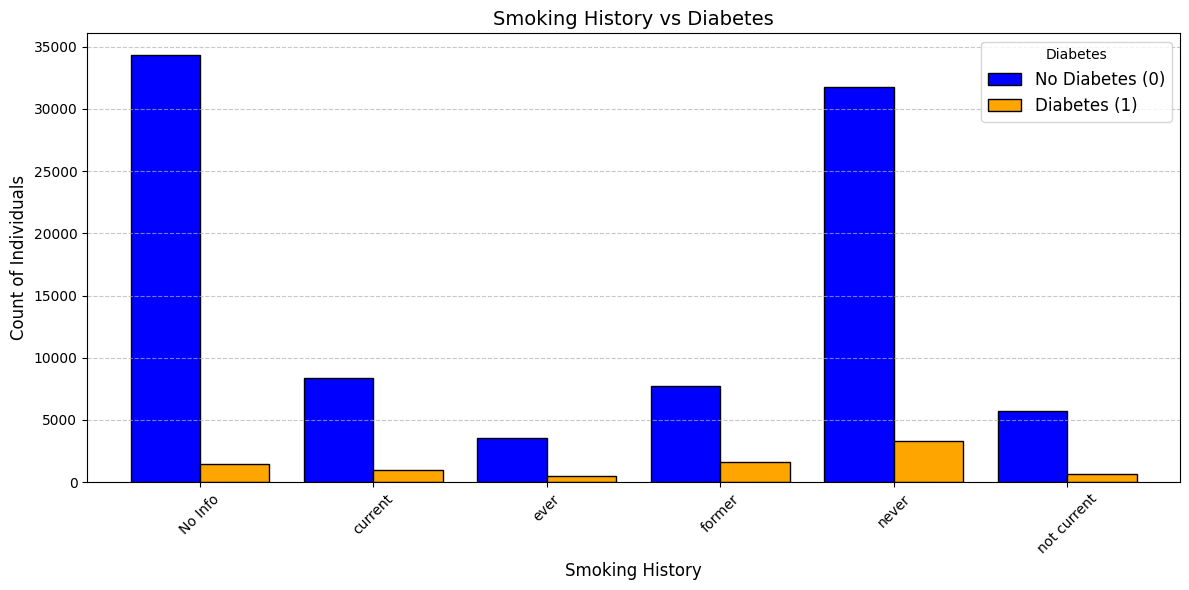

In [193]:
smoking_vs_diabetes = df.groupby(["smoking_history", "diabetes"]).size().unstack(fill_value=0)

smoking_vs_diabetes.plot(
    kind="bar",
    figsize=(12, 6),
    width=0.8,
    color=["blue", "orange"],
    edgecolor="black"
)

plt.title("Smoking History vs Diabetes", fontsize=14)
plt.xlabel("Smoking History", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(["No Diabetes (0)", "Diabetes (1)"], fontsize=12, title="Diabetes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


In [ ]:
#نتیجه گیری : این نمودار نشان میدهد که در هر دسته تعداد افراد غیر مبتلا بیشتر از افراد مبتلا است و با توجه به نمودار مبتلاها سیگار کشیدن تاثیر مستقیم و مثبتی بر دیابت گرفتن افراد نداره.

## General conclusion

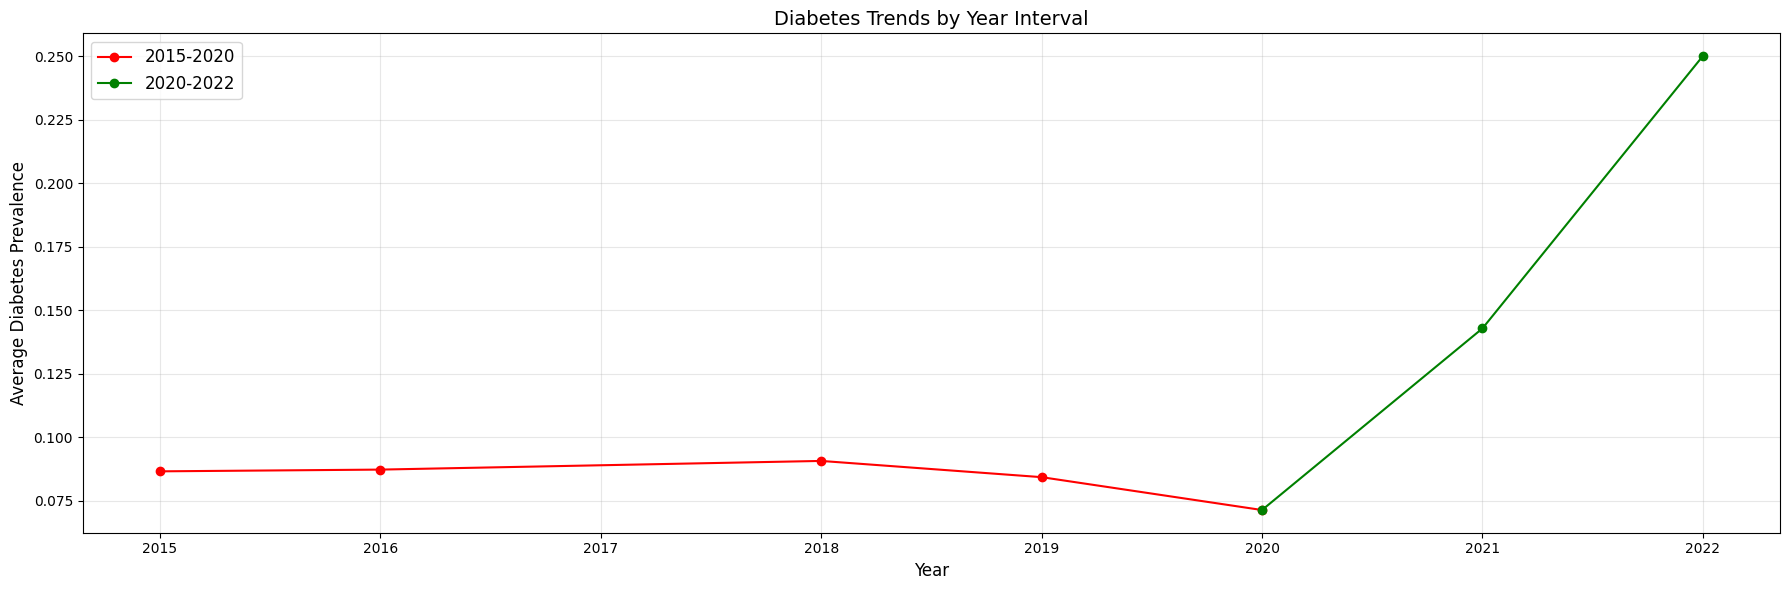

In [240]:

df = pd.read_csv("diabete.csv")
df_2015_2019 = df[(df["year"] >= 2015) & (df["year"] <= 2020)]
df_2019_2022 = df[(df["year"] >= 2020) & (df["year"] <= 2022)]

trend_2015_2019 = df_2015_2019.groupby("year")["diabetes"].mean()
trend_2019_2022 = df_2019_2022.groupby("year")["diabetes"].mean()

plt.figure(figsize=(18, 6))

plt.plot(trend_2015_2019.index, trend_2015_2019.values, marker="o", label="2015-2020", color="red")
plt.plot(trend_2019_2022.index, trend_2019_2022.values, marker="o", label="2020-2022", color="green")

plt.title("Diabetes Trends by Year Interval", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Diabetes Prevalence", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# نتیجه گیری : با توجه به نمودار که از 2015 تا 2022 را شامل میشود  روند به صورت صعودی و از 2020 شیب نمودار به شدت زیاد شده است پیشبینی میشود افزایش افراد دیابتی در سال های اینده